In [1]:
from apts import *
import pandas as pd
%matplotlib inline  

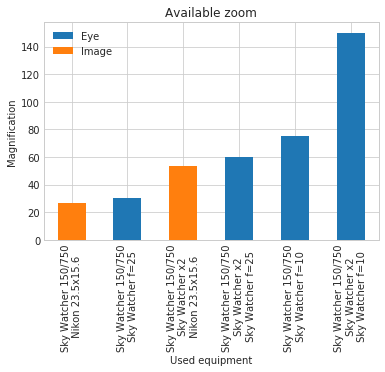

In [2]:
e = Equipment()

sky_watcher = "Sky Watcher"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

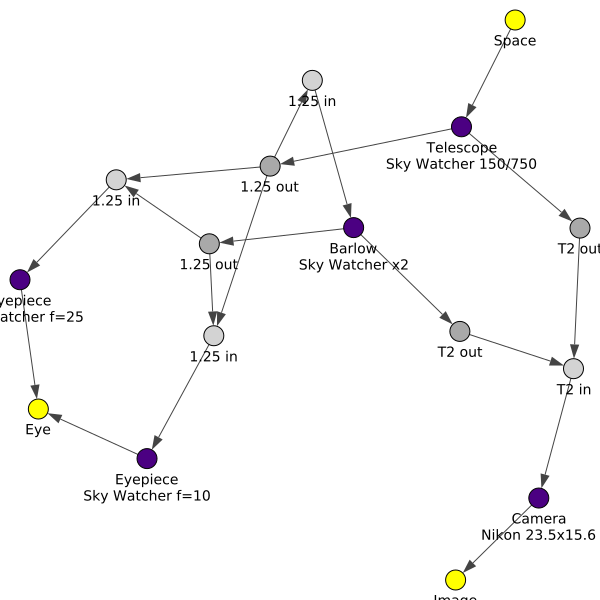

In [3]:
e.plot_connection_graph()

In [4]:
data = e.data()
data[data.Useful== True].sort_values(['FoV'], ascending=[0])

,Label,Type,Zoom,Useful,FoV,Range,Brightness,Elements
2,"Sky Watcher 150/750, Sky Watcher f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"Sky Watcher 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"Sky Watcher 150/750, Sky Watcher f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"Sky Watcher 150/750, Sky Watcher x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


In [5]:
place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

In [6]:
place.sunset_time()

datetime.datetime(2018, 4, 5, 19, 19, 14, 228789, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

In [7]:
place.get_weather()

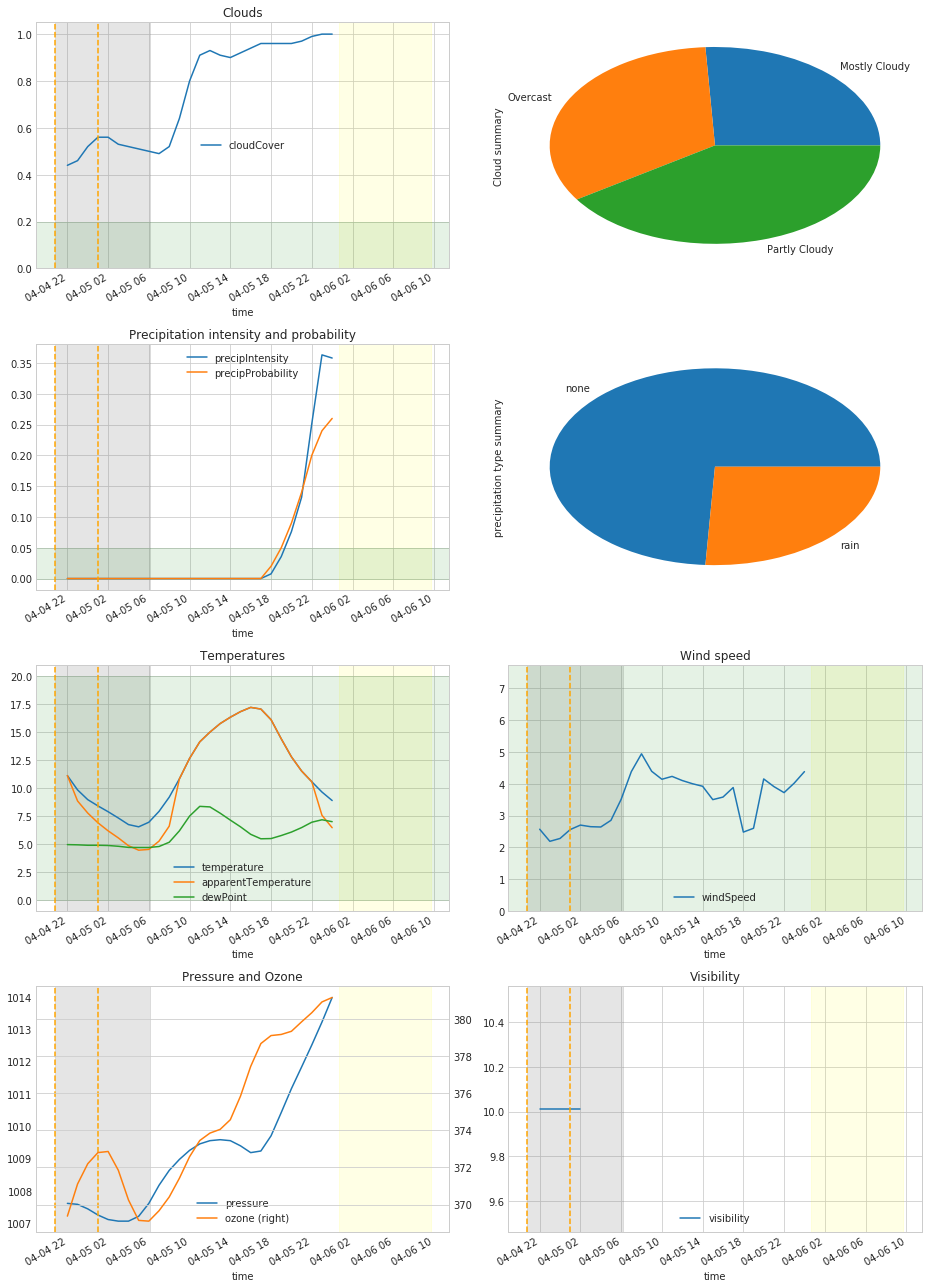

In [8]:
o.plot_weather()

In [9]:
o.weather_is_good()

False

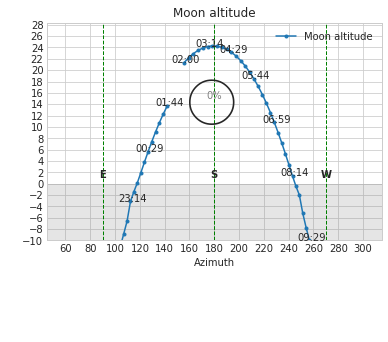

In [10]:
o.place.plot_moon_path()

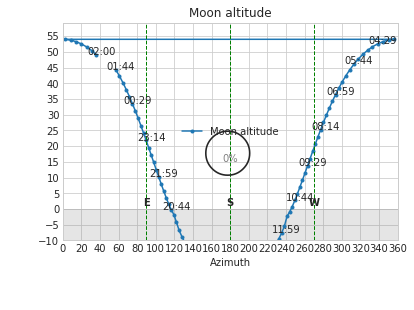

In [11]:
place = Place(lat=-50.1637973, lon=19.7855169, name="Example place")
place.plot_moon_path()

In [13]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [14]:
o.local_planets.objects

,Ephem,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase
0,"<Mercury ""Mercury"" at 0x7fd60f3721d0>",Mercury,2018-04-05 12:15:52.136540+02:00,45.270958,4.23,0.494728,5.419053,0.587673,2.081845
1,"<Venus ""Venus"" at 0x7fd60f372358>",Venus,2018-04-05 14:03:03.647413+02:00,53.262987,-3.81,2.286150,13.414954,1.561678,93.464035
2,"<Mars ""Mars"" at 0x7fd60f3724e0>",Mars,2018-04-05 06:32:14.147236+02:00,16.401968,0.20,18.751828,-23.488086,1.069981,87.890327
3,"<ephem.Jupiter ""Jupiter"" at 0x7fd60f6dba40>",Jupiter,2018-04-05 03:07:52.086887+02:00,22.796270,-2.24,15.336374,-17.077648,4.583048,99.691223
4,"<ephem.Saturn ""Saturn"" at 0x7fd60f6dbbb0>",Saturn,2018-04-05 06:26:06.740135+02:00,17.637659,0.48,18.649491,-22.248400,9.906122,99.755493
5,"<Uranus ""Uranus"" at 0x7fd60f372668>",Uranus,2018-04-05 13:29:46.402365+02:00,50.024469,5.90,1.729841,10.174977,20.869423,99.997208
6,"<Neptune ""Neptune"" at 0x7fd60f3727f0>",Neptune,2018-04-05 10:52:56.601184+02:00,33.145224,7.95,23.108851,-6.715252,30.801279,99.992836


In [15]:
o.get_visible_planets()

,Ephem,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase


In [16]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude


In [18]:
#o.plot_messier()

In [ ]:
#o.get_visible_messier().to_html('/tmp/list.html')

In [ ]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)